In [12]:
from google.colab import files
uploaded = files.upload()


Saving fruit_freshness.csv to fruit_freshness.csv


In [13]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout


In [14]:
data = pd.read_csv('fruit_freshness.csv')  # Use correct filename or path
print(data.head())  # Optional: Preview the data


   Min   Type   Temperature  Humidity  Methane  Firmness color   \
0  1.0  Banana           29        93      227       364  green   
1  2.0  Banana           29        93      230       364  green   
2  3.0  Banana           29        93      238       364  green   
3  4.0  Banana           29        93      240       303  green   
4  5.0  Banana           29        94      243       303  green   

    fresh fruits (Day)                     Stage  
0  fresh fruits (Day2)  ripening process initate  
1  fresh fruits (Day2)  ripening process initate  
2  fresh fruits (Day2)  ripening process initate  
3  fresh fruits (Day2)  ripening process initate  
4  fresh fruits (Day2)  ripening process initate  


In [15]:
# Load the dataset (assumed to be in CSV format)
data = pd.read_csv('/content/fruit_freshness.csv')


In [ ]:
# Display first few rows of the dataset
data.head()

,Min,Type,Temperature,Humidity,Methane,Firmness,color,fresh fruits (Day),Stage
0,1.0,Banana,29,93,227,364,green,fresh fruits (Day2),ripening process initate
1,2.0,Banana,29,93,230,364,green,fresh fruits (Day2),ripening process initate
2,3.0,Banana,29,93,238,364,green,fresh fruits (Day2),ripening process initate
3,4.0,Banana,29,93,240,303,green,fresh fruits (Day2),ripening process initate
4,5.0,Banana,29,94,243,303,green,fresh fruits (Day2),ripening process initate


In [ ]:
# Select features and the target variable (assuming 'Stage' is the target)
X = data[['Min', 'Temperature', 'Humidity', 'Methane', 'Firmness', 'color ', 'fresh fruits (Day)']]
y = data['Stage']  # 'Stage' is the freshness stage you want to predict

In [ ]:
# Perform one-hot encoding for categorical variables if needed
X = pd.get_dummies(X)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Reshape the input to be suitable for Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential


In [ ]:
# Define the CNN model
model = Sequential()


In [ ]:
# Add a Conv1D layer with 64 filters, kernel size of 2, and ReLU activation
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))

In [ ]:
# Flatten the output from Conv1D to feed into Dense layers
model.add(Flatten())

In [ ]:
# Add Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))

In [ ]:
# Final output layer with softmax activation (if multiple classes for Stage)
model.add(Dense(len(np.unique(y)), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,077 (387.02 KB)

 Trainable params: 99,077 (387.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Check dtypes if X is still a DataFrame
print(data.dtypes)





Min                   float64
Type                   object
Temperature             int64
Humidity                int64
Methane                 int64
Firmness                int64
color                  object
fresh fruits (Day)     object
Stage                  object
dtype: object


In [ ]:
# Check the type of X_train
print(type(X_train))  # Should be <class 'numpy.ndarray'>

# Check if the array contains any non-numeric values (like NaNs or Inf)
print(np.isnan(X_train).sum())  # Should print 0 if there are no NaNs
print(np.isinf(X_train).sum())  # Should print 0 if there are no infinite values

# Check the data type of the NumPy array
print(X_train.dtype)  # Should be float32 or float64


<class 'numpy.ndarray'>
1
0
float64


In [ ]:
# Replace NaN values with the mean of the column (for example)
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)


In [ ]:
# Perform one-hot encoding on categorical columns
X = pd.get_dummies(data[['Min', 'Temperature', 'Humidity', 'Methane', 'Firmness', 'color ', 'fresh fruits (Day)']])



In [ ]:
# Ensure X is a DataFrame at this stage
print(X.dtypes)

Min                                       float64
Temperature                                 int64
Humidity                                    int64
Methane                                     int64
Firmness                                    int64
color _green                                 bool
color _yellow                                bool
fresh fruits (Day)_ (Day7)                   bool
fresh fruits (Day)_fresh fruits (Day2)       bool
fresh fruits (Day)_fresh fruits (Day4)       bool
fresh fruits (Day)_fresh fruits (Day5)       bool
fresh fruits (Day)_fresh fruits (Day6)       bool
dtype: object


In [ ]:
# Standardize numerical values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X is now a NumPy array, so no dtypes, but you can check its type and shape
print(type(X))  # Should print <class 'numpy.ndarray'>
print(X.shape)


<class 'numpy.ndarray'>
(229, 12)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels if they are strings
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4026 - loss: 1.5525 - val_accuracy: 0.8913 - val_loss: 1.2015
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9034 - loss: 1.1504 - val_accuracy: 0.8913 - val_loss: 0.6890
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9296 - loss: 0.6457 - val_accuracy: 0.8913 - val_loss: 0.3676
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9366 - loss: 0.2971 - val_accuracy: 0.8913 - val_loss: 0.3196
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9363 - loss: 0.1720 - val_accuracy: 0.8913 - val_loss: 0.2257
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9147 - loss: 0.1689 - val_accuracy: 0.8913 - val_loss: 0.1705
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8988 - loss: 0.1600 - val_accuracy: 0.8913 - val_loss: 0.1894
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9205 - loss: 0.1619 - val_accuracy: 0.8913 - val_loss: 0.2371


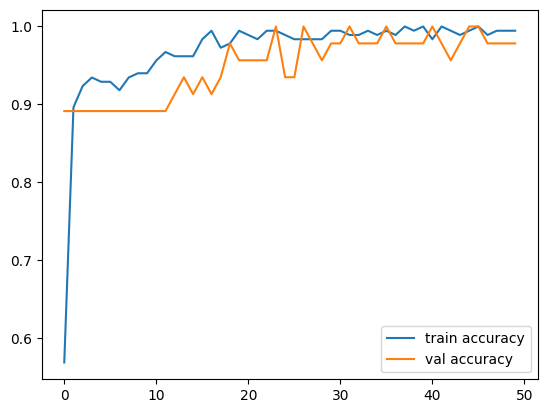

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

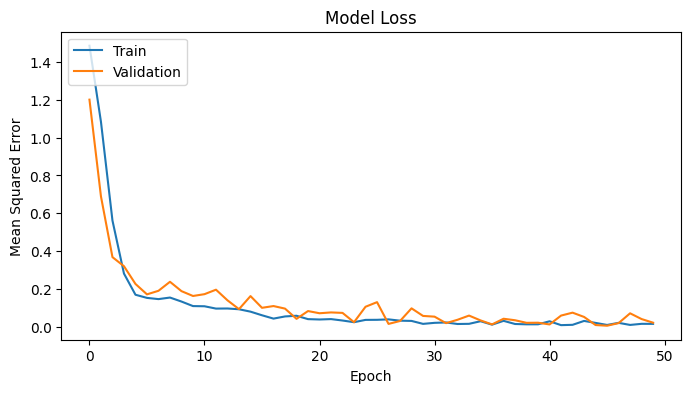

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Descriptive statistics for methane levels
print(data['Methane'].describe())

# Group by categories (e.g., freshness stage) to compare methane levels
print(data.groupby('Stage')['Methane'].describe())


count    229.000000
mean     445.248908
std      113.860965
min      227.000000
25%      339.000000
50%      460.000000
75%      530.000000
max      613.000000
Name: Methane, dtype: float64
                             count        mean        std    min     25%  \
Stage                                                                      
Start spoil                   30.0  607.566667   3.549486  602.0  603.25   
great eating flavor           46.0  517.217391  13.824154  490.0  506.00   
perfect for blender drinks    16.0  579.625000  25.837634  540.0  553.50   
ready for retail display      93.0  399.150538  67.494758  300.0  339.00   
ripening process initate      44.0  307.909091  63.361208  227.0  249.75   

                               50%     75%    max  
Stage                                              
Start spoil                  608.0  610.00  613.0  
great eating flavor          521.5  530.00  536.0  
perfect for blender drinks   600.0  602.00  603.0  
ready for retail 

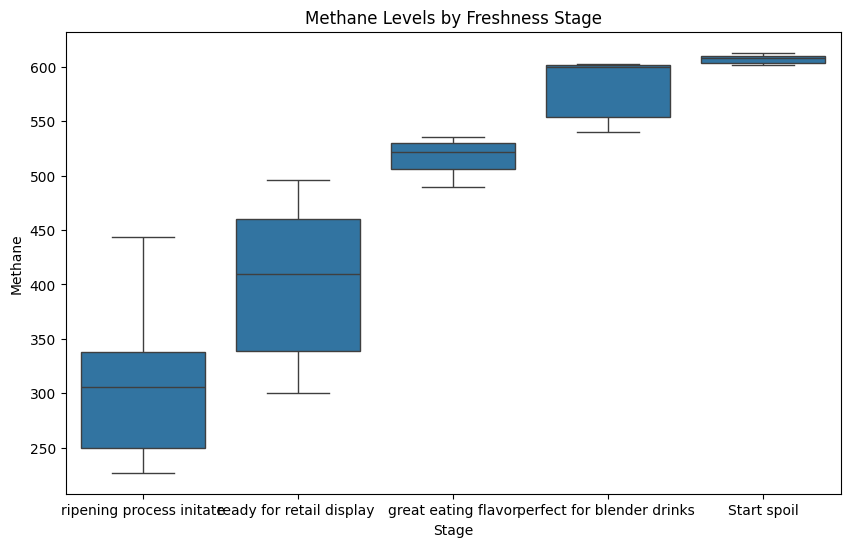

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of methane levels by freshness stage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage', y='Methane', data=data)
plt.title('Methane Levels by Freshness Stage')
plt.show()


In [ ]:
print(data.columns)


Index(['Min', 'Type ', 'Temperature', 'Humidity', 'Methane', 'Firmness',
       'color ', 'fresh fruits (Day)', 'Stage'],
      dtype='object')


<Axes: xlabel='fresh fruits (Day)', ylabel='Methane'>

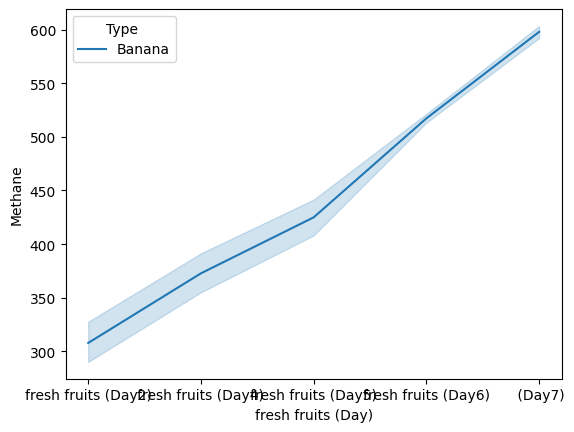

In [ ]:
# If the column is named 'Type ' (with a trailing space)
sns.lineplot(x='fresh fruits (Day)', y='Methane', hue='Type ', data=data)


Index(['Min', 'Type ', 'Temperature', 'Humidity', 'Methane', 'Firmness',
       'color ', 'fresh fruits (Day)', 'Stage'],
      dtype='object')


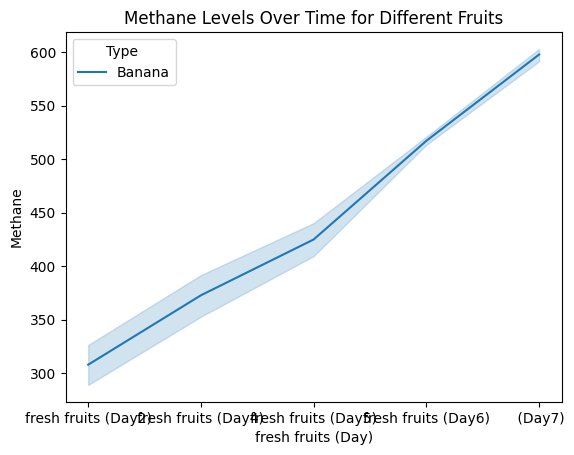

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check columns and types
print(data.columns)

# Example correction for column name
sns.lineplot(x='fresh fruits (Day)', y='Methane', hue='Type ', data=data)  # Adjust for correct column name

plt.title('Methane Levels Over Time for Different Fruits')
plt.show()


Index(['Min', 'Type ', 'Temperature', 'Humidity', 'Methane', 'Firmness',
       'color ', 'fresh fruits (Day)', 'Stage'],
      dtype='object')


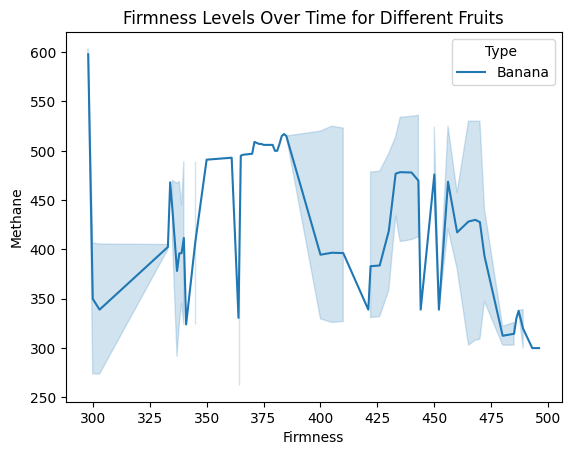

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check columns and types
print(data.columns)

# Example correction for column name
sns.lineplot(x='Firmness', y='Methane', hue='Type ', data=data)  # Adjust for correct column name

plt.title('Firmness Levels Over Time for Different Fruits')
plt.show()

Index(['Min', 'Type ', 'Temperature', 'Humidity', 'Methane', 'Firmness',
       'color ', 'fresh fruits (Day)', 'Stage'],
      dtype='object')


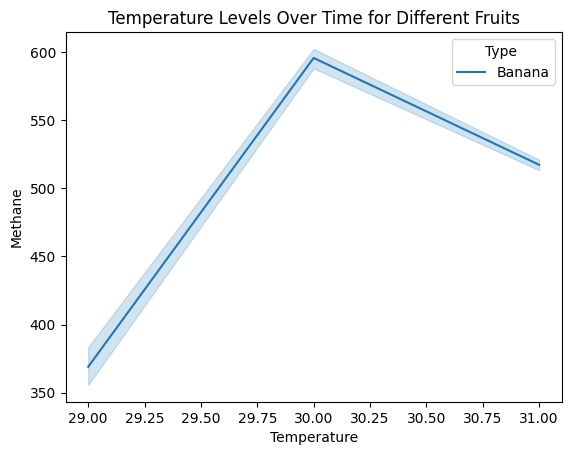

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check columns and types
print(data.columns)

# Example correction for column name
sns.lineplot(x='Temperature', y='Methane', hue='Type ', data=data)  # Adjust for correct column name

plt.title('Temperature Levels Over Time for Different Fruits')
plt.show()

Index(['Min', 'Type ', 'Temperature', 'Humidity', 'Methane', 'Firmness',
       'color ', 'fresh fruits (Day)', 'Stage'],
      dtype='object')


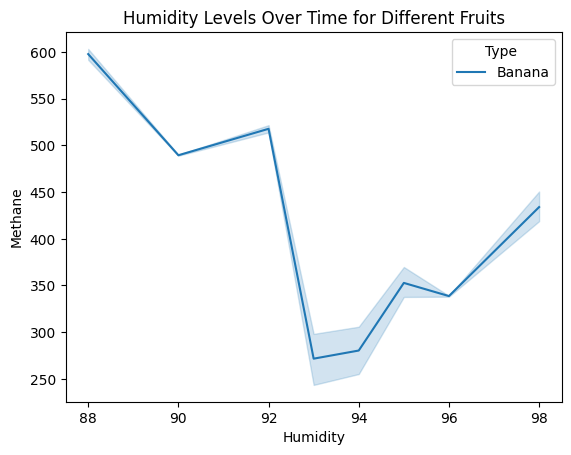

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check columns and types
print(data.columns)

# Example correction for column name
sns.lineplot(x='Humidity', y='Methane', hue='Type ', data=data)  # Adjust for correct column name

plt.title('Humidity Levels Over Time for Different Fruits')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9751 - loss: 0.0235
Test Accuracy: 97.83%


In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction Accuracy: 97.83%


In [ ]:
model.save('fruit_freshness_model.keras')



In [ ]:
import plotly.graph_objs as go
import plotly.io as pio




In [ ]:
# Assuming you have a training history object from fitting your model
history = {
    'accuracy': [0.1, 0.2, 0.3, 0.4, 0.5],
    'val_accuracy': [0.1, 0.15, 0.25, 0.35, 0.45]
}


In [ ]:
# Convert epochs to a list
epochs = list(range(len(history['accuracy'])))  # Convert range to list


In [ ]:
# Create the scatter plot
trace1 = go.Scatter(x=epochs, y=history['accuracy'], mode='lines', name='Train Accuracy')
trace2 = go.Scatter(x=epochs, y=history['val_accuracy'], mode='lines', name='Validation Accuracy')

layout = go.Layout(title='Model Accuracy over Epochs', xaxis=dict(title='Epochs'), yaxis=dict(title='Accuracy'))
fig = go.Figure(data=[trace1, trace2], layout=layout)

In [ ]:
# Show the plot
fig.show()

In [ ]:
# Install Dash, Plotly, and Pyngrok
!pip install dash plotly pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.2 MB/s eta 0:00:00


In [ ]:
# Check installed versions
import dash
import plotly
import pyngrok

print(f"Dash version: {dash.__version__}")
print(f"Plotly version: {plotly.__version__}")
print(f"Pyngrok version: {pyngrok.__version__}")


Dash version: 2.18.1
Plotly version: 5.24.1
Pyngrok version: 7.2.0


In [ ]:
# Step 1: Install Required Libraries
!pip install dash plotly pyngrok

In [ ]:
# Step 2: Import Libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
from pyngrok import ngrok


In [ ]:
# Load the dataset (assumed to be in CSV format)
data = pd.read_csv('/content/fruit_freshness.csv')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/fruit_freshness.csv')  # Replace with your actual file name

In [ ]:
# Create a Dash Application
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [ ]:
# Initialize the Dash app
app = dash.Dash("Fruit Freshness Dashboard")

In [ ]:
from dash.dependencies import Input, Output, State


In [ ]:
from dash import Input, Output, State


In [ ]:
pip show dash


Name: dash
Version: 2.18.1
Summary: A Python framework for building reactive web-apps. Developed by Plotly.
Home-page: https://plotly.com/dash
Author: Chris Parmer
Author-email: chris@plotly.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: dash-core-components, dash-html-components, dash-table, Flask, importlib-metadata, nest-asyncio, plotly, requests, retrying, setuptools, typing-extensions, Werkzeug
Required-by: 


In [ ]:
import dash
from dash import html, dcc, Input, Output, State

In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go

In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)
server = app.server  # For deployment purposes


In [ ]:
df = pd.read_csv('/content/fruit_freshness.csv')

In [ ]:
# Step 6: Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Fruit Freshness Dashboard"),

    # Dropdown for selecting data type (accuracy)
    html.Label("Select Data Type:"),
    dcc.Dropdown(
        id='data-type-dropdown',
        options=[
            {'label': 'Train Accuracy', 'value': 'accuracy'},
            {'label': 'Validation Accuracy', 'value': 'val_accuracy'}
        ],
        value='accuracy',  # Default value
        multi=False  # Single selection
    ),

    # Graph placeholder for accuracy
    dcc.Graph(id='accuracy-plot'),

    # Input for Methane value
    html.Label("Enter Methane Value:"),
    dcc.Input(id='methane-input', type='number', placeholder='Enter methane value'),

    # Button to submit the methane value
    html.Button('Submit', id='submit-button', n_clicks=0),

    # Display the corresponding freshness stage
    html.Div(id='output-stage', style={'margin-top': '20px'})
])

In [ ]:
import plotly.graph_objs as go

@app.callback(
    [Output('accuracy-plot', 'figure'),
     Output('output-stage', 'children')],
    [Input('data-type-dropdown', 'value'),
     Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('methane-input', 'value')]
)
def update_graph(selected_data_type, n_clicks, methane_value):
    # Example data; replace with your actual data sources
    epochs = list(range(1, 11))
    accuracy = [0.6 + 0.04 * epoch for epoch in epochs]
    val_accuracy = [0.58 + 0.035 * epoch for epoch in epochs]

    # Select the data based on dropdown
    if selected_data_type == 'accuracy':
        y_data = accuracy
        label = 'Train Accuracy'
    else:
        y_data = val_accuracy
        label = 'Validation Accuracy'

    # Create the figure
    fig = go.Figure(data=[
        go.Scatter(x=epochs, y=y_data, mode='lines+markers', name=label)
    ])

    # If methane value is provided, add a vertical line or annotation
    if methane_value is not None:
        fig.add_vline(x=methane_value, line=dict(color='Red', dash='dash'))
        freshness_stage = f"Freshness Stage: {determine_freshness_stage(methane_value)}"
    else:
        freshness_stage = "Please enter a methane value."

    fig.update_layout(title='Accuracy Over Epochs',
                      xaxis_title='Epoch',
                      yaxis_title='Accuracy',
                      template='plotly_white')

    return fig, freshness_stage

def determine_freshness_stage(methane):
    # Placeholder function; implement your logic here
    if methane < 230:
        return "ripening process initate(Day2)"
    elif methane < 406:
        return "ready for retail display(Day4)"
    elif methane < 500:
        return "great eating flavor"
    else:
        return "Start spoil"


In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.